In [1]:
# import the data
# sep x,y
# find out the coef , intercept
# y = m1*x1 + m2*x2 + m3*x3 + c

#KNN Regressor


# calculate r2_score
#compared

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

sns.set()

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,x,y
0,48.955889,60.723602
1,44.687196,82.892504
2,60.297327,97.379897
3,45.618644,48.847153
4,38.816818,56.877213


In [5]:
x =df['x']
y =df['y']

In [6]:
m = 0
c = 0
learning_rate = 0.0001

n = int(len(x))

for i in range (1000):
    pred = m * x + c
    der_m = (-2/n)*sum(x*(y-pred))
    der_c = (-2/n)*sum(y-pred)
    
    m = m - learning_rate*der_m
    c = c - learning_rate*der_c
   #print(m,c)
print(m,c)

1.4796491688881985 0.10148121497503648


In [7]:
x = float(input("Enter x : "))
y = x * m + c
y

Enter x : 38.816818


57.5367537075595

In [8]:
rand_state = 1000

In [9]:
df = pd.read_csv('insurance.csv')

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Data Preprocessing

In [12]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [14]:
df = pd.get_dummies(df,drop_first=True)

In [15]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801
sex_male,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
smoker_yes,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region_northwest,1338.0,0.242900,0.428995,0.0000,0.00000,0.000,0.000000,1.00000
region_southeast,1338.0,0.272048,0.445181,0.0000,0.00000,0.000,1.000000,1.00000
region_southwest,1338.0,0.242900,0.428995,0.0000,0.00000,0.000,0.000000,1.00000


# Data Visualization

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


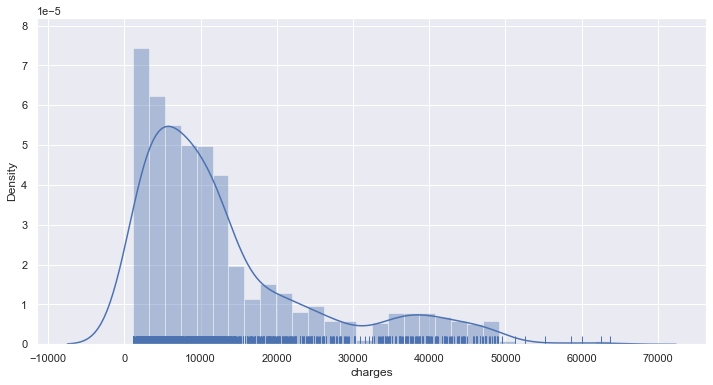

In [17]:
plt.figure(figsize=(12,6))
sns.distplot(df['charges'], rug=True)
plt.show()

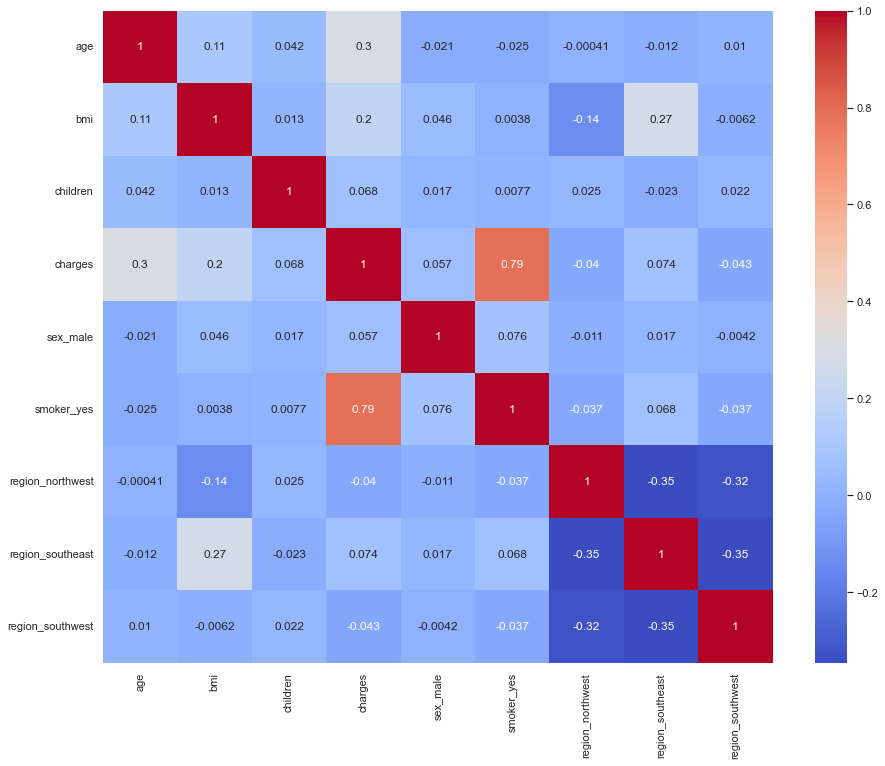

In [18]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

# Train and Test set Split

In [19]:
y = df['charges']
x = df.drop('charges', axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=rand_state)

#checking the precentage of training set!
np.round(len(x_train)/ len(x),3)

0.7

In [20]:
x_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
204,46,22.300,0,1,0,0,0,1
1264,49,33.345,2,0,0,0,0,0
313,49,35.860,0,1,0,0,1,0
1283,18,30.030,1,1,0,0,1,0
321,26,29.640,4,0,0,0,0,0


# Linear Regression with Scikit-Learn

In [21]:
reg_model = LinearRegression()

In [22]:
reg_model.fit(x_train, y_train)

LinearRegression()

# Predictions

In [23]:
y_hat = reg_model.predict(x_test)

In [24]:
df_predictions = pd.DataFrame({'actuals':y_test, 'predictions':y_hat, 'resid': y_test - y_hat})
df_predictions.head()

,actuals,predictions,resid
132,11163.56800,13605.292414,-2441.724414
51,3579.82870,5543.976255,-1964.147555
42,6272.47720,5490.008405,782.468795
569,45702.02235,37713.906279,7988.116071
470,2497.03830,4822.688567,-2325.650267


In [25]:
# The coefficients of the regression
reg_model.coef_

array([  252.80646825,   299.71267201,   391.90028143,  -256.25306699,
       23521.90106851,  -113.686827  , -1024.03552983,  -822.52541748])

In [26]:
#The intercept of the regression
reg_model.intercept_

-10514.410473905536

In [27]:
# Lets create a new data frame with the name of the features
reg_summary = pd.DataFrame(data = x_train.columns, columns=['Features'])
reg_summary ['Coefficients'] =  np.round(reg_model.coef_,4)
reg_summary

,Features,Coefficients
0,age,252.8065
1,bmi,299.7127
2,children,391.9003
3,sex_male,-256.2531
4,smoker_yes,23521.9011
5,region_northwest,-113.6868
6,region_southeast,-1024.0355
7,region_southwest,-822.5254


# Evaluation metrics

# R-squared

In [28]:
# The Train set R-squared of the Regression
reg_model.score(x_train,y_train)

0.7362514073650333

In [29]:
print('Training data R_squared:', np.round(reg_model.score(x_train,y_train),3))
print('Test data R_squared:', np.round(reg_model.score(x_train,y_train),3))

Training data R_squared: 0.736
Test data R_squared: 0.736


# Adjusted R_squared

In [30]:
x_train.shape

(936, 8)

In [31]:
def adj_R2(X,y): 
    R2 = reg_model.score(X,y)
    n  = X.shape[0]
    k  = X.shape[1]
    return np.round(1-(1-R2)*(n-1)/(n-k-1),3)

In [32]:
adj_R2(x_train,y_train)

0.734

In [33]:
adj_R2(x_test,y_test)

0.773

# MSE and RMSE

In [34]:
df_predictions.head()

,actuals,predictions,resid
132,11163.56800,13605.292414,-2441.724414
51,3579.82870,5543.976255,-1964.147555
42,6272.47720,5490.008405,782.468795
569,45702.02235,37713.906279,7988.116071
470,2497.03830,4822.688567,-2325.650267


In [35]:
MSE_test = np.mean(np.square(df_predictions['resid']))
np.round(MSE_test,3)

35670540.658

In [36]:
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

5972.482

# KNN Regression with Sklearn

In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [38]:
#Fitting KNN regression to the training set

KNN_regression = KNeighborsRegressor(n_neighbors=5)
KNN_regression.fit(x_train,y_train)

KNeighborsRegressor()

In [39]:
#Predicting the test set results
y_hat = KNN_regression.predict(x_test)

In [40]:
predictions = pd.DataFrame({'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
132,11163.56800,21394.843524
51,3579.82870,7372.140334
42,6272.47720,16668.417360
569,45702.02235,16023.322760
470,2497.03830,9547.481108


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


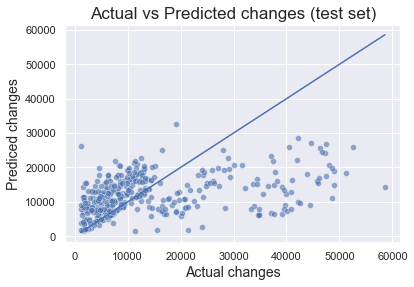

In [41]:
sns.scatterplot(x=y_test,y=y_hat, alpha=0.6)
sns.lineplot(y_test, y_test)
plt.xlabel('Actual changes',fontsize=14)
plt.ylabel('Prediced changes',fontsize=14)
plt.title('Actual vs Predicted changes (test set)', fontsize=17)
plt.show()

In [42]:
KNN_regression.score(x_test,y_test)

0.16175501018040095

In [43]:
KNN_regression.score(x_train,y_train)

0.40515449142236837

# Preformance metrics

In [44]:
MSE_test = round(np.mean(np.square(y_test - y_hat)))
MSE_test

134574778

In [45]:
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

11600.64